DIABETES PREDICTION - COMPREHENSIVE ML ALGORITHMS COMPARISON

[1/8] Loading Dataset...

📁 Please upload your 'diabetes.csv' file when prompted...


Saving diabetes.csv to diabetes (1).csv

✓ Dataset loaded successfully!
Dataset shape: (768, 9)

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-

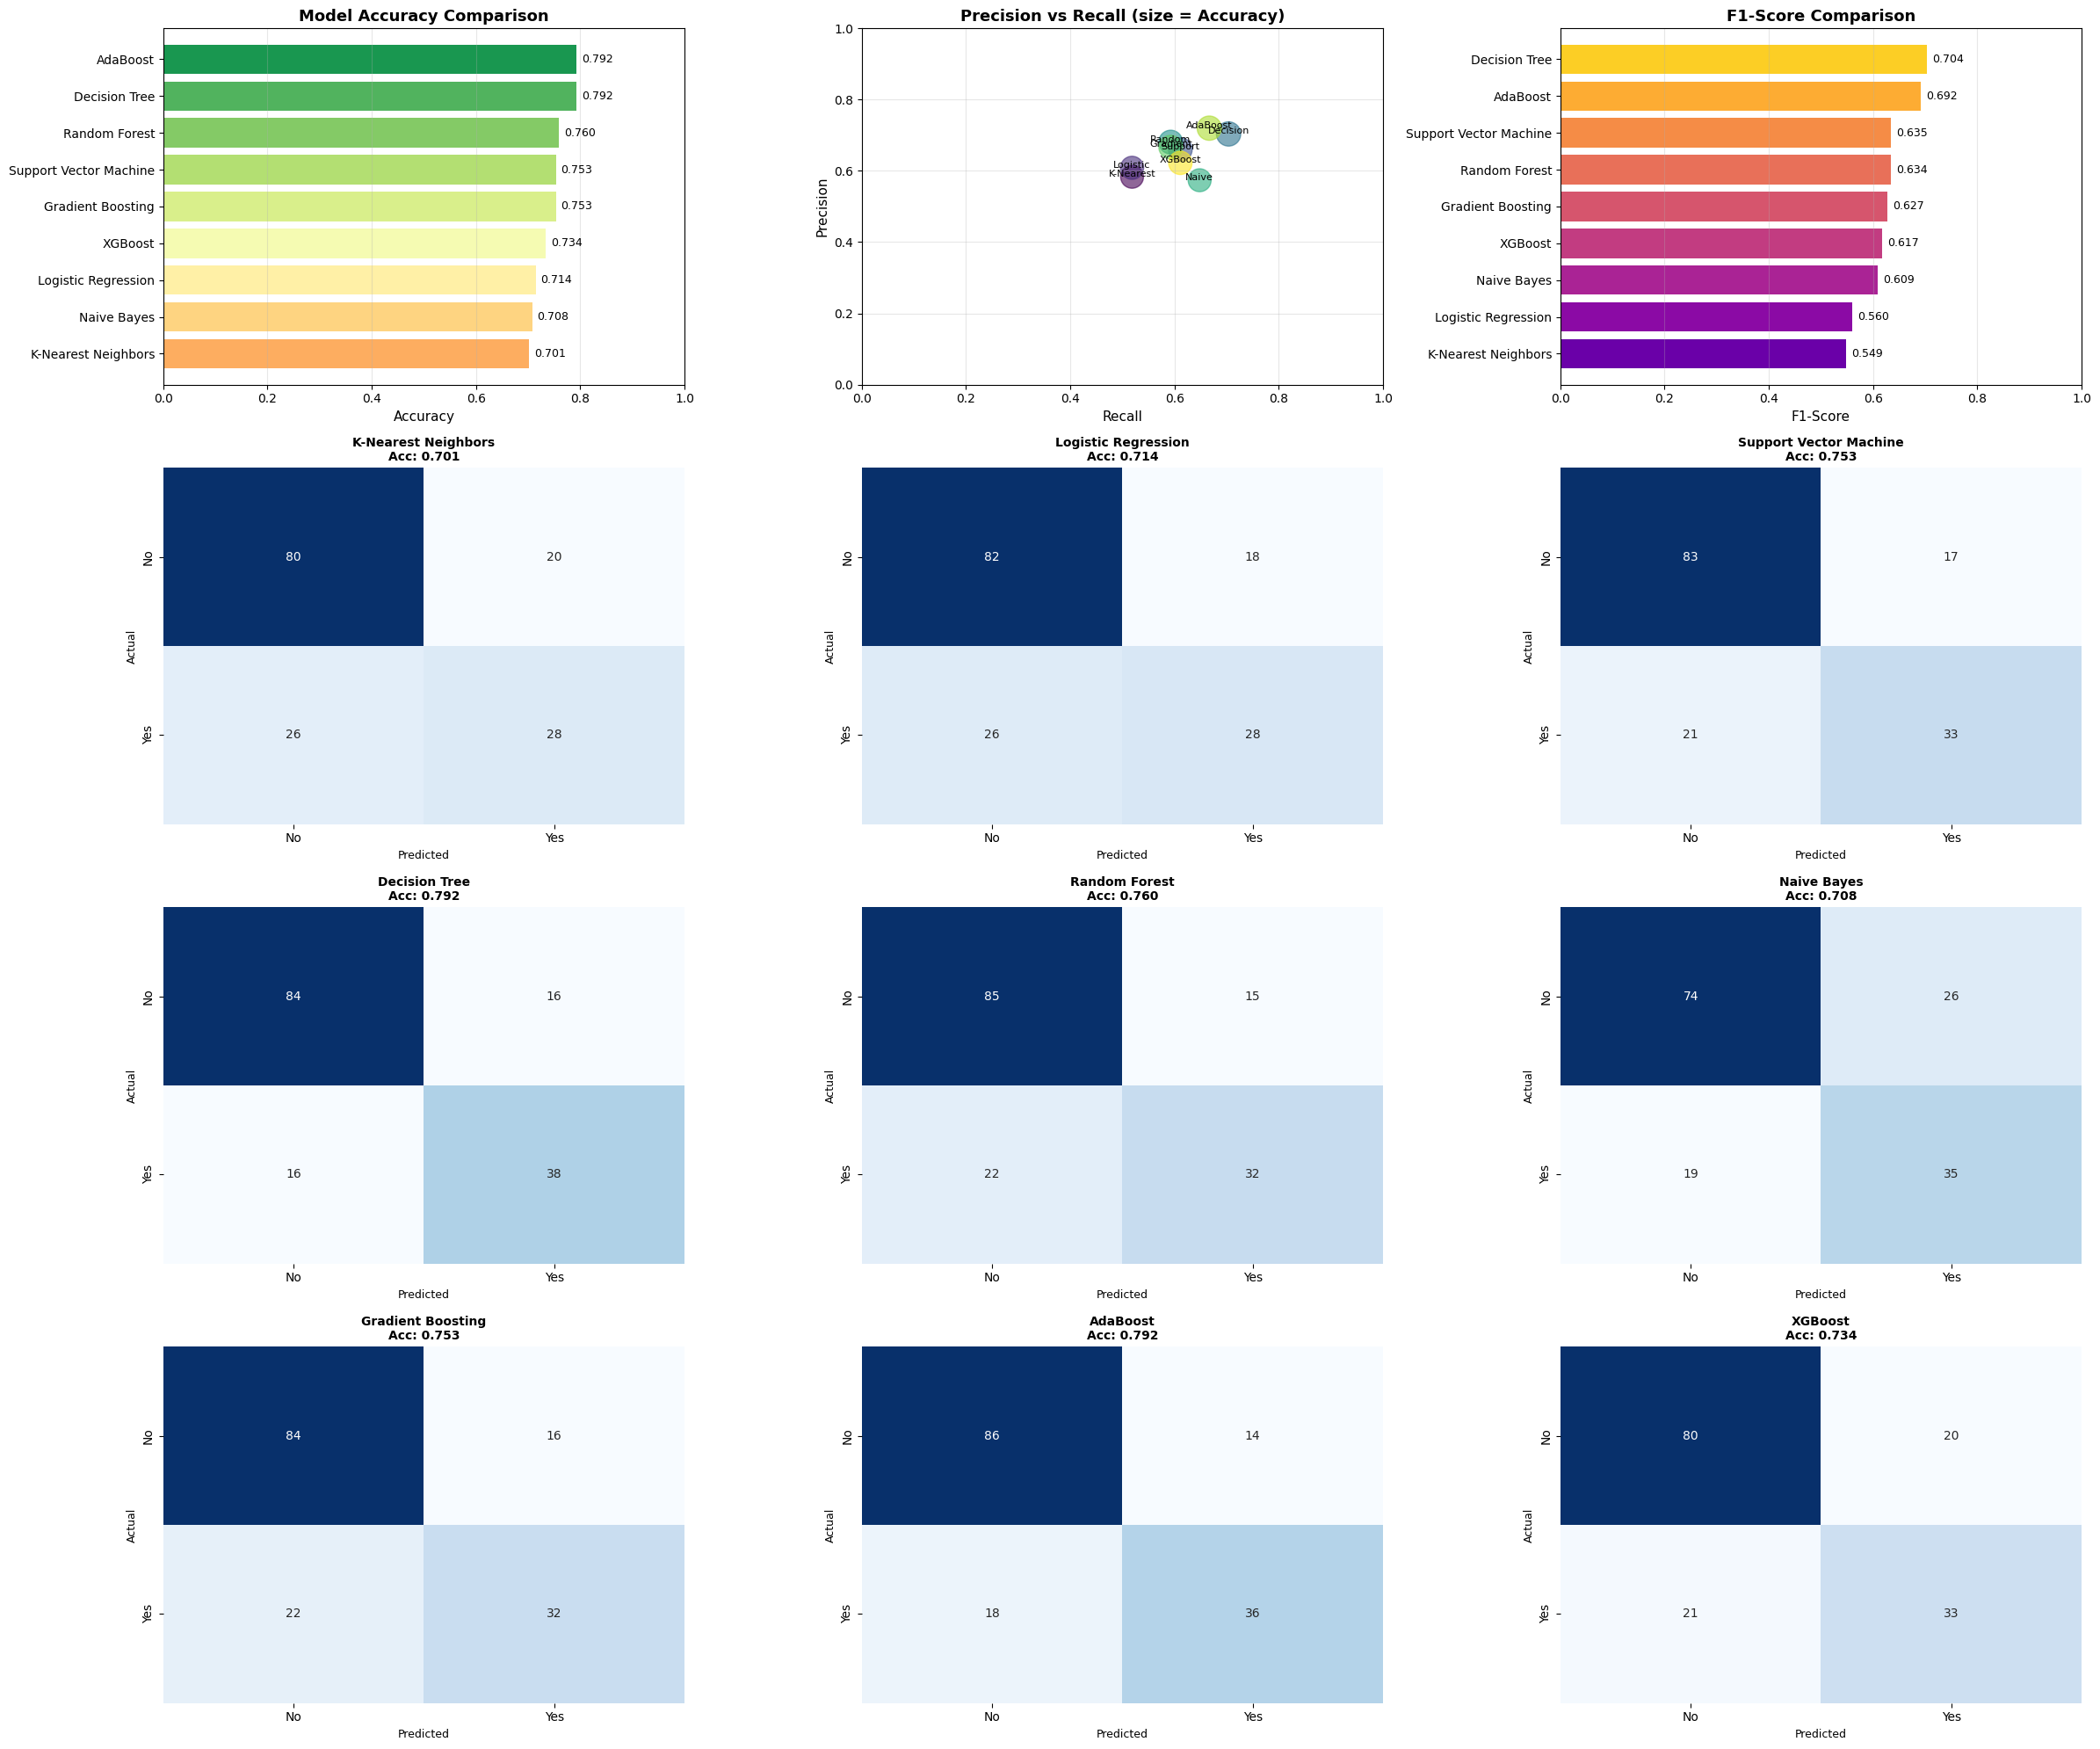

✓ Saved: diabetes_models_comprehensive_analysis.png


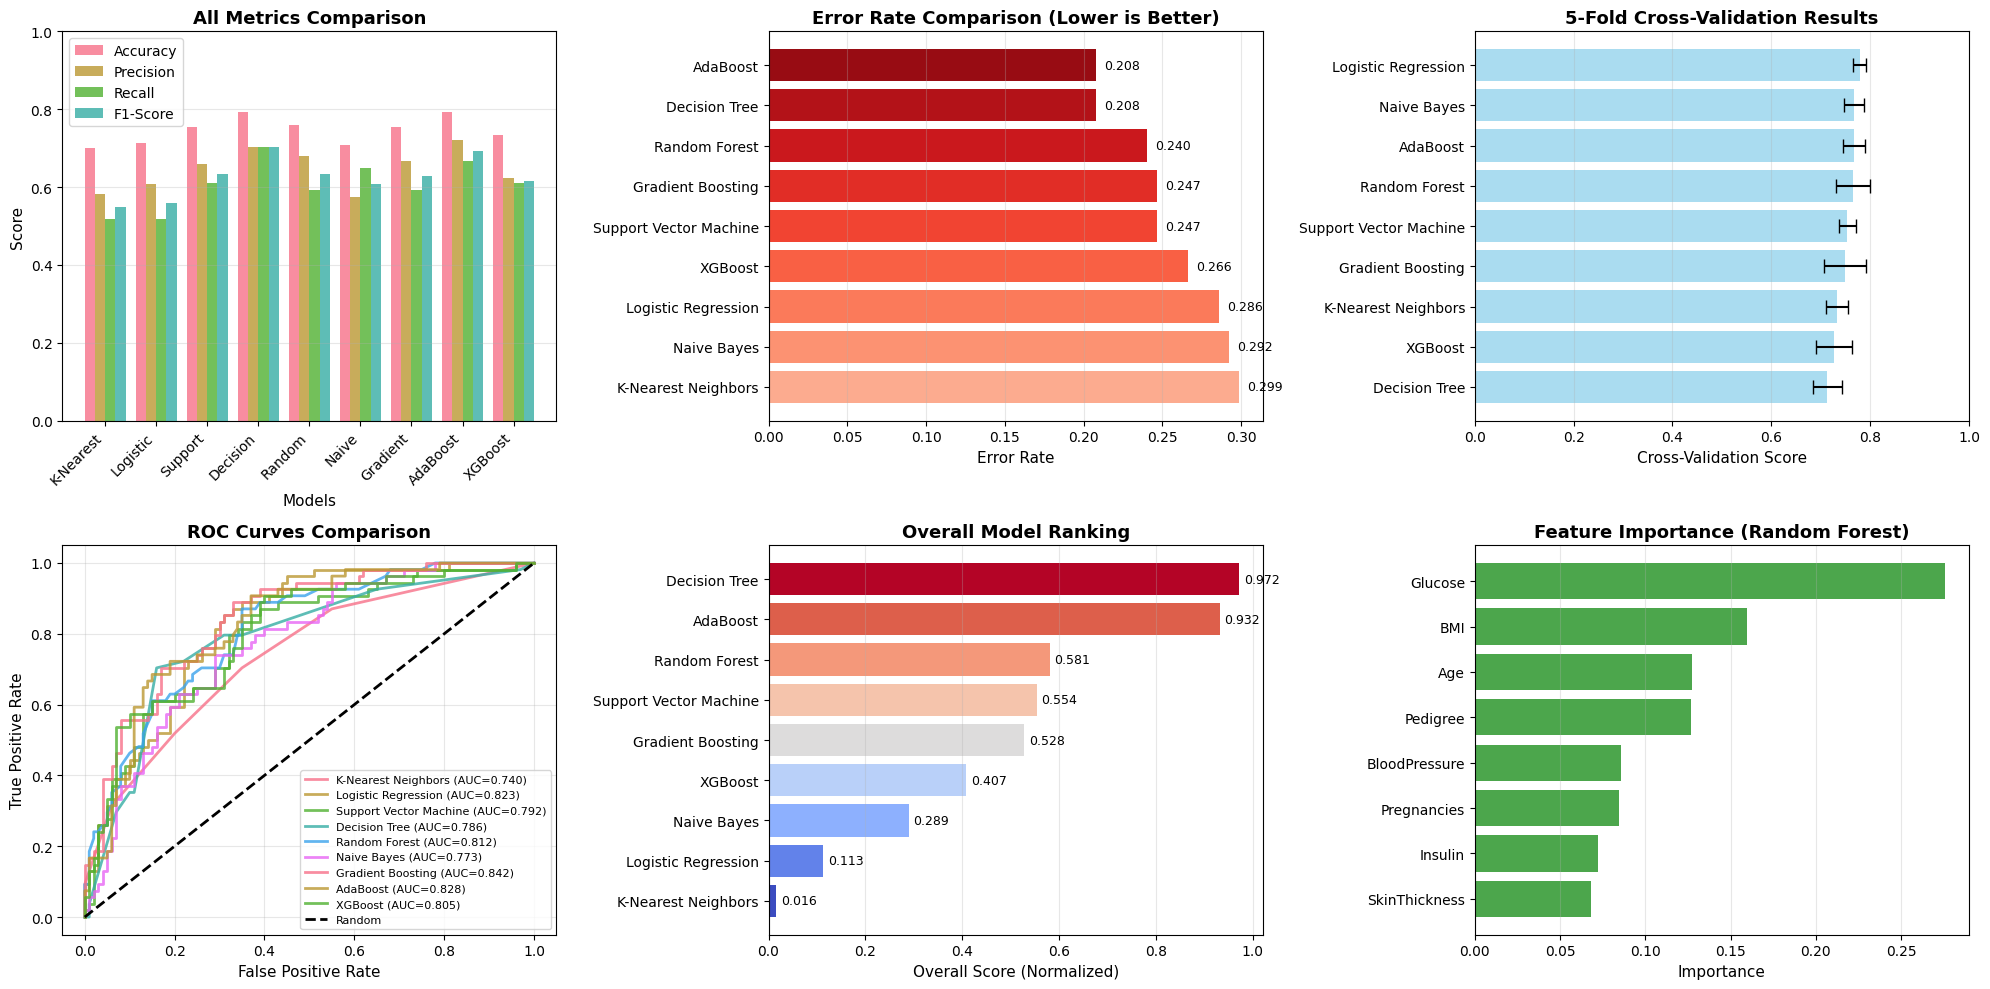


[8/8] Exporting Results...
✓ Results exported to: diabetes_models_results.xlsx
✓ Results exported to: diabetes_models_results.csv

📄 FINAL SUMMARY REPORT

Dataset: Diabetes Dataset
Total Samples: 768
Training Samples: 614
Test Samples: 154
Number of Features: 8
Number of Models Evaluated: 9

🥇 TOP 3 MODELS BY ACCURACY:
1. Decision Tree                  - Accuracy: 0.7922 (79.22%)
2. AdaBoost                       - Accuracy: 0.7922 (79.22%)
3. Random Forest                  - Accuracy: 0.7597 (75.97%)

🎯 TOP 3 MODELS BY F1-SCORE:
1. Decision Tree                  - F1-Score: 0.7037
2. AdaBoost                       - F1-Score: 0.6923
3. Support Vector Machine         - F1-Score: 0.6346

✅ ANALYSIS COMPLETE!

Generated Files:
  1. diabetes_models_confusion_matrices.png
  2. diabetes_models_comprehensive_analysis.png
  3. diabetes_models_results.xlsx
  4. diabetes_models_results.csv



In [3]:
"""
Diabetes Prediction using Multiple Machine Learning Algorithms
Dataset: diabetes.csv from Kaggle
Implements: KNN, Logistic Regression, SVM, Decision Trees, Random Forest,
            Naive Bayes, Gradient Boosting, AdaBoost, XGBoost
"""

# Install required packages
!pip install xgboost scikit-learn pandas numpy matplotlib seaborn openpyxl -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             roc_auc_score, roc_curve)

# Import all classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

print("=" * 100)
print("DIABETES PREDICTION - COMPREHENSIVE ML ALGORITHMS COMPARISON")
print("=" * 100)

# ============================================================================
# 1. LOAD AND EXPLORE DATASET
# ============================================================================
print("\n[1/8] Loading Dataset...")

# Download the dataset from Kaggle
# For Google Colab, you can upload the file or use the Kaggle API
# Here's how to upload manually:
print("\n📁 Please upload your 'diabetes.csv' file when prompted...")

from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('diabetes.csv')

print(f"\n✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset Information:")
print(df.info())

print(f"\nStatistical Summary:")
print(df.describe())

print(f"\nMissing Values:")
print(df.isnull().sum())

print(f"\nTarget Variable Distribution:")
print(df['Outcome'].value_counts())
print(f"Diabetes prevalence: {df['Outcome'].mean():.2%}")

# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================
print("\n" + "="*100)
print("[2/8] Data Preprocessing...")
print("="*100)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training set outcome distribution:\n{y_train.value_counts()}")
print(f"Test set outcome distribution:\n{y_test.value_counts()}")

# Feature scaling (important for KNN, SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data preprocessing completed!")

# ============================================================================
# 3. DEFINE ALL MODELS
# ============================================================================
print("\n" + "="*100)
print("[3/8] Initializing Machine Learning Models...")
print("="*100)

models = {
    # Group i) KNN, Logistic Regression, SVM
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),

    # Group ii) Decision Trees, Random Forest, Naive Bayes, Gradient Boosting, AdaBoost
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),

    # Group iii) XGBoost
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss')
}

# Models that need scaled data
scaled_models = ['K-Nearest Neighbors', 'Logistic Regression', 'Support Vector Machine']

print(f"✓ Initialized {len(models)} models:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"   {i}. {model_name}")

# ============================================================================
# 4. TRAIN AND EVALUATE ALL MODELS
# ============================================================================
print("\n" + "="*100)
print("[4/8] Training and Evaluating Models...")
print("="*100)

results = []
predictions = {}
prediction_probabilities = {}

for model_name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Training: {model_name}")
    print(f"{'='*80}")

    # Use scaled data for certain models
    if model_name in scaled_models:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        print("Using scaled features")
    else:
        X_train_use = X_train
        X_test_use = X_test
        print("Using original features")

    # Train the model
    model.fit(X_train_use, y_train)

    # Make predictions
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1] if hasattr(model, 'predict_proba') else None

    # Store predictions
    predictions[model_name] = y_pred
    prediction_probabilities[model_name] = y_pred_proba

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC (if probability predictions available)
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_use, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Error Rate': error_rate,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc if roc_auc else 'N/A',
        'CV Score': cv_mean,
        'CV Std': cv_std,
        'Confusion Matrix': cm
    })

    # Print results
    print(f"\n📊 Performance Metrics:")
    print(f"   Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Error Rate:  {error_rate:.4f} ({error_rate*100:.2f}%)")
    print(f"   Precision:   {precision:.4f}")
    print(f"   Recall:      {recall:.4f}")
    print(f"   F1-Score:    {f1:.4f}")
    if roc_auc:
        print(f"   ROC-AUC:     {roc_auc:.4f}")
    print(f"   CV Score:    {cv_mean:.4f} (+/- {cv_std:.4f})")

    print(f"\n📈 Confusion Matrix:")
    print(f"   TN: {cm[0,0]:4d}  |  FP: {cm[0,1]:4d}")
    print(f"   FN: {cm[1,0]:4d}  |  TP: {cm[1,1]:4d}")

print("\n" + "="*100)
print("✓ All models trained and evaluated!")
print("="*100)

# ============================================================================
# 5. RESULTS COMPARISON
# ============================================================================
print("\n" + "="*100)
print("[5/8] Comparing All Models")
print("="*100)

# Create results dataframe
results_df = pd.DataFrame(results)
results_df_display = results_df.drop('Confusion Matrix', axis=1)

print("\n📊 COMPREHENSIVE RESULTS TABLE:")
print("="*100)
print(results_df_display.to_string(index=False))

# Find best models
print("\n" + "="*100)
print("🏆 BEST MODELS BY METRIC:")
print("="*100)
print(f"Best Accuracy:   {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']:30s} ({results_df['Accuracy'].max():.4f})")
print(f"Best Precision:  {results_df.loc[results_df['Precision'].idxmax(), 'Model']:30s} ({results_df['Precision'].max():.4f})")
print(f"Best Recall:     {results_df.loc[results_df['Recall'].idxmax(), 'Model']:30s} ({results_df['Recall'].max():.4f})")
print(f"Best F1-Score:   {results_df.loc[results_df['F1-Score'].idxmax(), 'Model']:30s} ({results_df['F1-Score'].max():.4f})")

# Calculate ROC-AUC for models that support it
roc_auc_results = results_df[results_df['ROC-AUC'] != 'N/A'].copy()
if not roc_auc_results.empty:
    best_roc_idx = roc_auc_results['ROC-AUC'].idxmax()
    print(f"Best ROC-AUC:    {roc_auc_results.loc[best_roc_idx, 'Model']:30s} ({roc_auc_results.loc[best_roc_idx, 'ROC-AUC']:.4f})")

# ============================================================================
# 6. DETAILED CLASSIFICATION REPORTS
# ============================================================================
print("\n" + "="*100)
print("[6/8] Detailed Classification Reports")
print("="*100)

for model_name, y_pred in predictions.items():
    print(f"\n{'='*80}")
    print(f"{model_name}")
    print(f"{'='*80}")
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("\n" + "="*100)
print("[7/8] Creating Visualizations...")
print("="*100)

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualization
fig = plt.figure(figsize=(24, 20))

# Plot 1: Accuracy Comparison
ax1 = plt.subplot(4, 3, 1)
accuracy_sorted = results_df.sort_values('Accuracy', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(accuracy_sorted)))
ax1.barh(accuracy_sorted['Model'], accuracy_sorted['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy', fontsize=11)
ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_xlim(0, 1)
for i, v in enumerate(accuracy_sorted['Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Precision vs Recall
ax2 = plt.subplot(4, 3, 2)
scatter = ax2.scatter(results_df['Recall'], results_df['Precision'],
                     s=results_df['Accuracy']*500, alpha=0.6,
                     c=range(len(results_df)), cmap='viridis')
for i, model in enumerate(results_df['Model']):
    ax2.annotate(model.split()[0],
                (results_df['Recall'].iloc[i], results_df['Precision'].iloc[i]),
                fontsize=8, ha='center')
ax2.set_xlabel('Recall', fontsize=11)
ax2.set_ylabel('Precision', fontsize=11)
ax2.set_title('Precision vs Recall (size = Accuracy)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

# Plot 3: F1-Score Comparison
ax3 = plt.subplot(4, 3, 3)
f1_sorted = results_df.sort_values('F1-Score', ascending=True)
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(f1_sorted)))
ax3.barh(f1_sorted['Model'], f1_sorted['F1-Score'], color=colors)
ax3.set_xlabel('F1-Score', fontsize=11)
ax3.set_title('F1-Score Comparison', fontsize=13, fontweight='bold')
ax3.set_xlim(0, 1)
for i, v in enumerate(f1_sorted['F1-Score']):
    ax3.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
ax3.grid(axis='x', alpha=0.3)

# Plot 4-12: Confusion Matrices (3x3 grid)
for idx, (model_name, result) in enumerate(results_df.iterrows(), 4):
    ax = plt.subplot(4, 3, idx)
    cm = result['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    ax.set_title(f"{result['Model']}\nAcc: {result['Accuracy']:.3f}",
                fontsize=10, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=9)
    ax.set_xlabel('Predicted', fontsize=9)

plt.tight_layout()
plt.savefig('diabetes_models_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("✓ Saved: diabetes_models_confusion_matrices.png")
plt.show()

# Additional visualizations
fig2 = plt.figure(figsize=(20, 10))

# Plot 1: All Metrics Comparison
ax1 = plt.subplot(2, 3, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2
for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)
ax1.set_xlabel('Models', fontsize=11)
ax1.set_ylabel('Score', fontsize=11)
ax1.set_title('All Metrics Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels([m.split()[0] for m in results_df['Model']], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 1)

# Plot 2: Error Rate Comparison
ax2 = plt.subplot(2, 3, 2)
error_sorted = results_df.sort_values('Error Rate', ascending=False)
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(error_sorted)))
ax2.barh(error_sorted['Model'], error_sorted['Error Rate'], color=colors)
ax2.set_xlabel('Error Rate', fontsize=11)
ax2.set_title('Error Rate Comparison (Lower is Better)', fontsize=13, fontweight='bold')
for i, v in enumerate(error_sorted['Error Rate']):
    ax2.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Cross-Validation Scores
ax3 = plt.subplot(2, 3, 3)
cv_sorted = results_df.sort_values('CV Score', ascending=True)
ax3.barh(cv_sorted['Model'], cv_sorted['CV Score'],
         xerr=cv_sorted['CV Std'], capsize=5, color='skyblue', alpha=0.7)
ax3.set_xlabel('Cross-Validation Score', fontsize=11)
ax3.set_title('5-Fold Cross-Validation Results', fontsize=13, fontweight='bold')
ax3.set_xlim(0, 1)
ax3.grid(axis='x', alpha=0.3)

# Plot 4: ROC Curves
ax4 = plt.subplot(2, 3, 4)
for model_name, y_pred_proba in prediction_probabilities.items():
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        ax4.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc_score:.3f})', alpha=0.8)
ax4.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
ax4.set_xlabel('False Positive Rate', fontsize=11)
ax4.set_ylabel('True Positive Rate', fontsize=11)
ax4.set_title('ROC Curves Comparison', fontsize=13, fontweight='bold')
ax4.legend(fontsize=8, loc='lower right')
ax4.grid(True, alpha=0.3)

# Plot 5: Model Ranking
ax5 = plt.subplot(2, 3, 5)
# Calculate overall rank based on average of normalized metrics
results_df_norm = results_df.copy()
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    results_df_norm[metric + '_norm'] = (results_df[metric] - results_df[metric].min()) / (results_df[metric].max() - results_df[metric].min())
results_df_norm['Overall Score'] = results_df_norm[['Accuracy_norm', 'Precision_norm', 'Recall_norm', 'F1-Score_norm']].mean(axis=1)
results_df_norm = results_df_norm.sort_values('Overall Score', ascending=True)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(results_df_norm)))
ax5.barh(results_df_norm['Model'], results_df_norm['Overall Score'], color=colors)
ax5.set_xlabel('Overall Score (Normalized)', fontsize=11)
ax5.set_title('Overall Model Ranking', fontsize=13, fontweight='bold')
for i, v in enumerate(results_df_norm['Overall Score']):
    ax5.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
ax5.grid(axis='x', alpha=0.3)

# Plot 6: Feature Importance (Random Forest)
ax6 = plt.subplot(2, 3, 6)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)
ax6.barh(feature_importance['Feature'], feature_importance['Importance'], color='green', alpha=0.7)
ax6.set_xlabel('Importance', fontsize=11)
ax6.set_title('Feature Importance (Random Forest)', fontsize=13, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('diabetes_models_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: diabetes_models_comprehensive_analysis.png")
plt.show()

# ============================================================================
# 8. EXPORT RESULTS
# ============================================================================
print("\n" + "="*100)
print("[8/8] Exporting Results...")
print("="*100)

# Export to Excel
results_export = results_df.copy()
results_export['Confusion Matrix'] = results_export['Confusion Matrix'].apply(lambda x: str(x))

results_export.to_excel('diabetes_models_results.xlsx', index=False)
print("✓ Results exported to: diabetes_models_results.xlsx")

# Export to CSV
results_export.to_csv('diabetes_models_results.csv', index=False)
print("✓ Results exported to: diabetes_models_results.csv")

# Create detailed report
print("\n" + "="*100)
print("📄 FINAL SUMMARY REPORT")
print("="*100)
print(f"\nDataset: Diabetes Dataset")
print(f"Total Samples: {len(df)}")
print(f"Training Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")
print(f"Number of Features: {X.shape[1]}")
print(f"Number of Models Evaluated: {len(models)}")

print(f"\n🥇 TOP 3 MODELS BY ACCURACY:")
top3 = results_df.nlargest(3, 'Accuracy')
for i, (idx, row) in enumerate(top3.iterrows(), 1):
    print(f"{i}. {row['Model']:30s} - Accuracy: {row['Accuracy']:.4f} ({row['Accuracy']*100:.2f}%)")

print(f"\n🎯 TOP 3 MODELS BY F1-SCORE:")
top3_f1 = results_df.nlargest(3, 'F1-Score')
for i, (idx, row) in enumerate(top3_f1.iterrows(), 1):
    print(f"{i}. {row['Model']:30s} - F1-Score: {row['F1-Score']:.4f}")

print("\n" + "="*100)
print("✅ ANALYSIS COMPLETE!")
print("="*100)
print("\nGenerated Files:")
print("  1. diabetes_models_confusion_matrices.png")
print("  2. diabetes_models_comprehensive_analysis.png")
print("  3. diabetes_models_results.xlsx")
print("  4. diabetes_models_results.csv")
print("\n" + "="*100)